#### RSC sequence from Bao et al. PRX (2024)

In [2]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_sim
from pathos.multiprocessing import Pool

In [2]:
sequence_XY, sequence_XYZ1, sequence_XYZ2, sequence_XYZ3, sequence_XYZ4 = RSC_sim.get_original_sequence()
ground_state_counts = []
nums_survive = []
n_bars = []

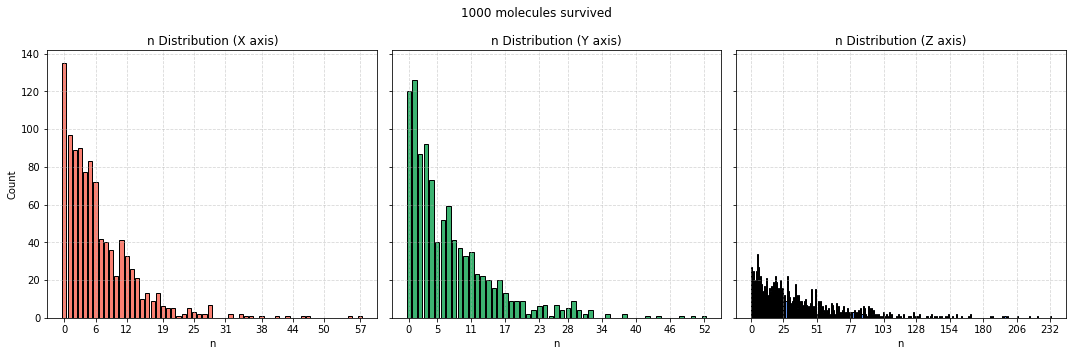

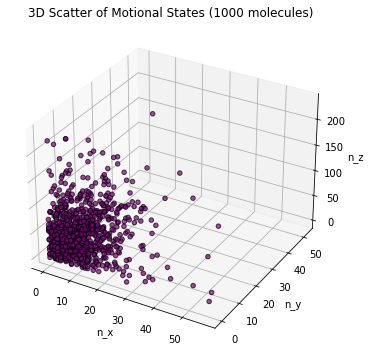

In [3]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_, _, _ = RSC_sim.get_n_distribution(mol_list)

## 10 * XY

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:02<00:00, 404.89it/s]


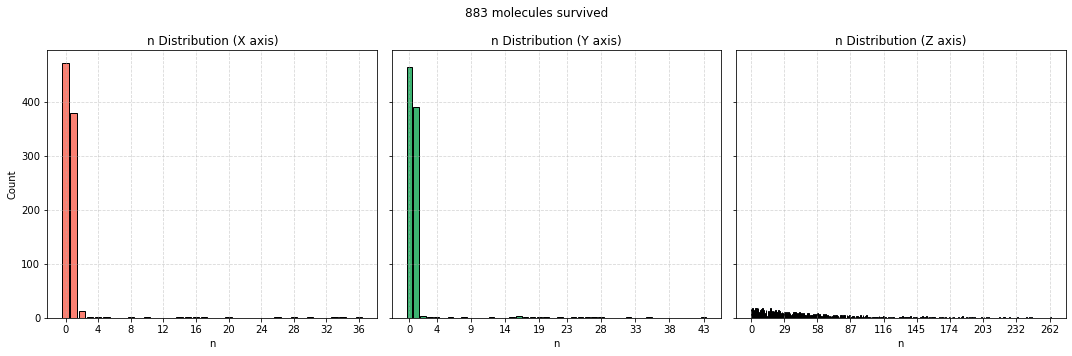

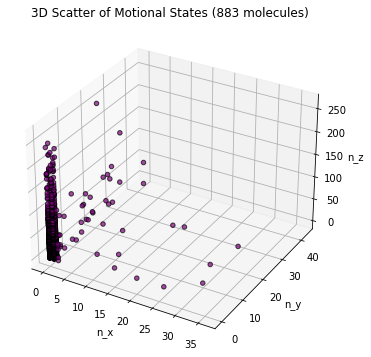

In [4]:
for n in range(10):
    n_bar, num_survive, ground_state_count, sem_n, sem_survive, sem_gsc = RSC_sim.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XY
    )
    ground_state_counts.append(ground_state_count)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
_, _, _ = RSC_sim.get_n_distribution(mol_list)

## 5 * XYZ1

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:03<00:00, 287.71it/s]


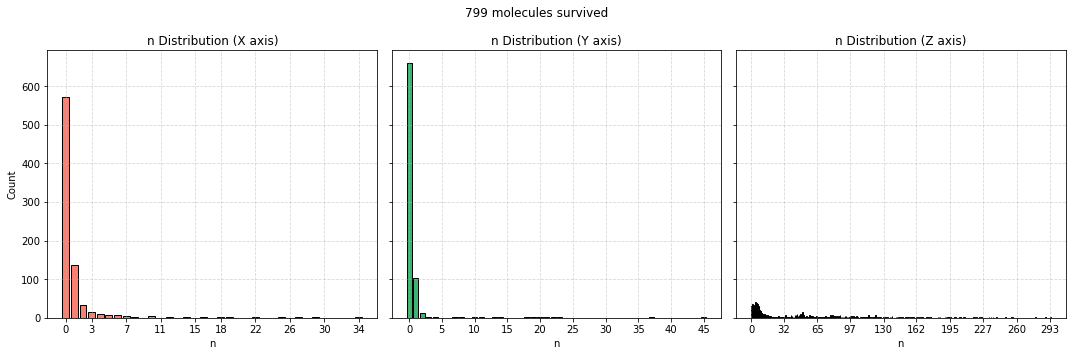

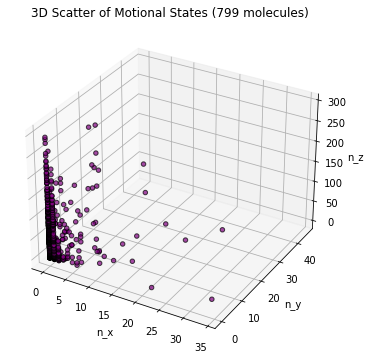

In [5]:
for n in range(5):
    n_bar, num_survive, ground_state_count, sem_n, sem_survive, sem_gsc = RSC_sim.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ1
    )
    ground_state_counts.append(ground_state_count)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
_, _, _ = RSC_sim.get_n_distribution(mol_list)

## 5 * XYZ2

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:03<00:00, 272.17it/s]


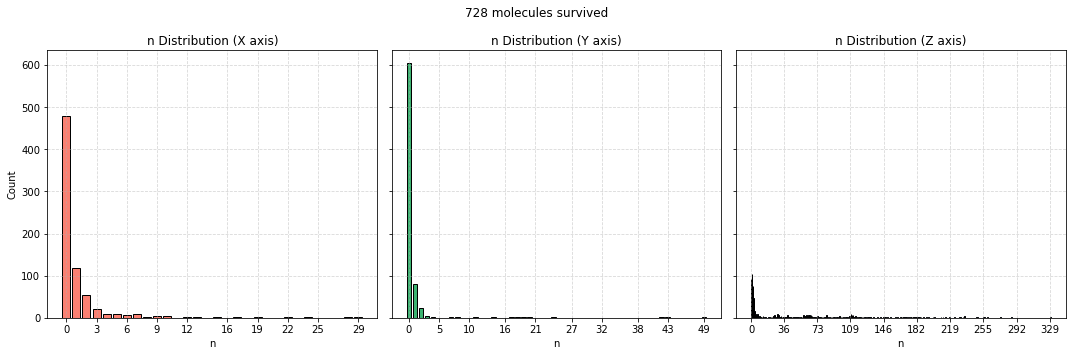

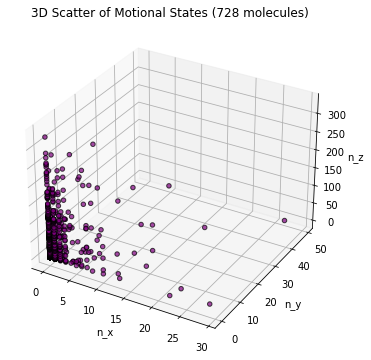

In [6]:
for n in range(5):
    n_bar, num_survive, ground_state_count, sem_n, sem_survive, sem_gsc = RSC_sim.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ2
    )
    ground_state_counts.append(ground_state_count)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
_, _, _ = RSC_sim.get_n_distribution(mol_list)

### 10 * XYZ3

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:03<00:00, 281.38it/s]


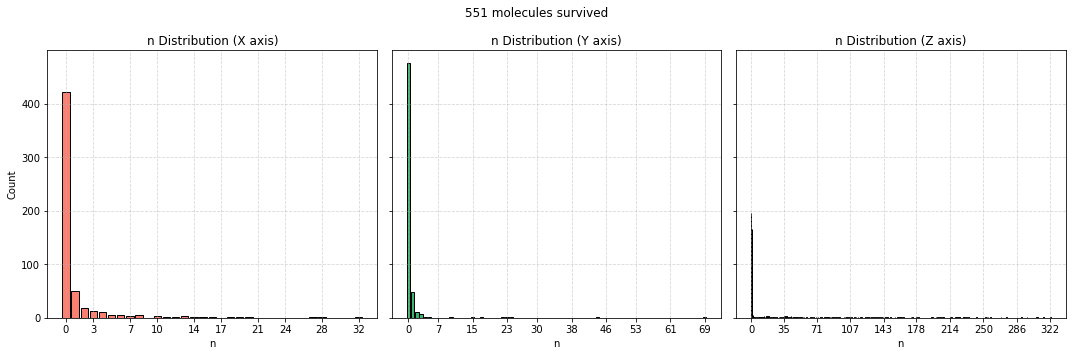

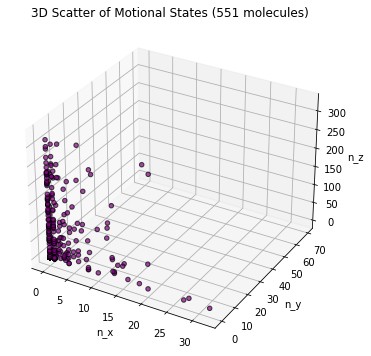

In [7]:
for n in range(10):
    n_bar, num_survive, ground_state_count, sem_n, sem_survive, sem_gsc = RSC_sim.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ3
    )
    ground_state_counts.append(ground_state_count)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
_, _, _ = RSC_sim.get_n_distribution(mol_list)

### 10 * XYZ4

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:02<00:00, 349.58it/s]


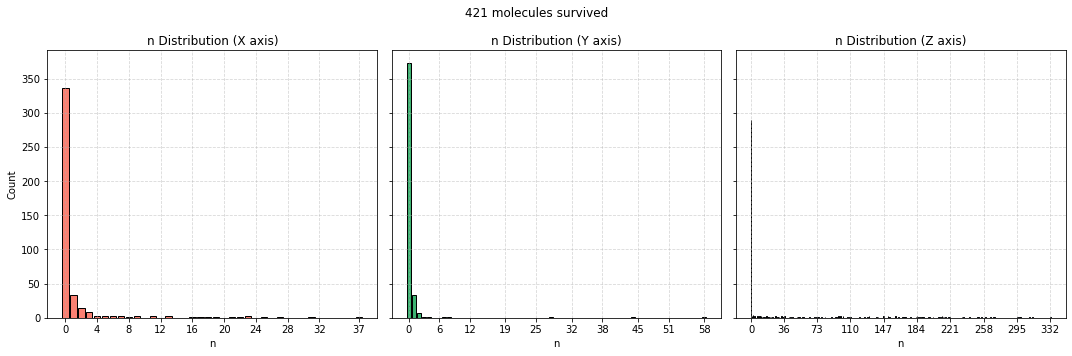

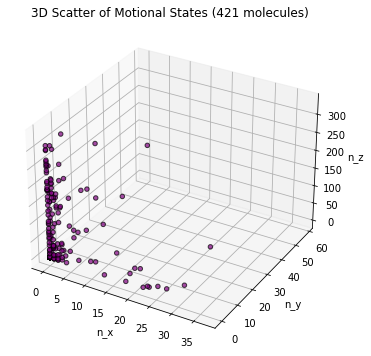

In [8]:
for n in range(10):
    n_bar, num_survive, ground_state_count, sem_n, sem_survive, sem_gsc = RSC_sim.apply_raman_sequence(
        mol_list=mol_list, pulse_sequence=sequence_XYZ4
    )
    ground_state_counts.append(ground_state_count)
    nums_survive.append(num_survive)
    n_bars.append(n_bar)
_, _, _ = RSC_sim.get_n_distribution(mol_list)

#### Plot parameters vs pulse number

In [10]:
sequence = RSC_sim.load_sequence('sequences/original.txt')
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
n_bar, num_survive, ground_state_count, _, _, _ = RSC_sim.apply_raman_sequence(mol_list, sequence)
ground_state_counts.append(ground_state_count)
nums_survive.append(num_survive)
n_bars.append(n_bar)

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:43<00:00, 22.90it/s]


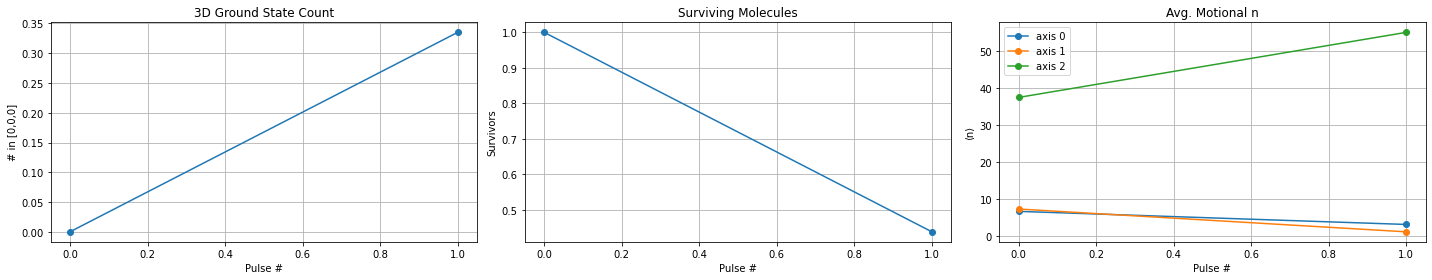

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(20, 4))

# Plot 1: Ground state count
axs[0].plot(range(len(ground_state_count)), ground_state_count, marker='o')
axs[0].set_title("3D Ground State Count")
axs[0].set_xlabel("Pulse #")
axs[0].set_ylabel("# in [0,0,0]")
axs[0].grid(True)

# Plot 2: Molecules Survived
axs[1].plot(range(len(num_survive)), num_survive, marker='o')
axs[1].set_title("Surviving Molecules")
axs[1].set_xlabel("Pulse #")
axs[1].set_ylabel("Survivors")
axs[1].grid(True)

# Plot 3: Average n per axis
for i in [0, 1, 2]:
    axs[2].plot(range(len(n_bar)), np.array(n_bar)[:, i], marker='o', label=f'axis {i}')
axs[2].set_title("Avg. Motional n")
axs[2].set_xlabel("Pulse #")
axs[2].set_ylabel("⟨n⟩")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
